In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Image Editing

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_editing.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
|Author(s) | [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Vertex AI SDK for Python to interact with Imagen 3 and modify existing images with mask-based editing in the following modes:

- Inpainting
- Product background editing
- Outpainting
- Controlled customization

## Get started


### Install Vertex AI SDK for Python


In [3]:
%pip install --upgrade --user google-cloud-aiplatform

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [4]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [1]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [2]:
PROJECT_ID = "nini-c05d6"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries

In [3]:
from vertexai.preview.vision_models import (
    ControlReferenceImage,
    Image,
    ImageGenerationModel,
    MaskReferenceImage,
    RawReferenceImage,
)

### Define helper functions

In [4]:
import io

from PIL import Image as PIL_Image
import matplotlib.pyplot as plt


# Gets the image bytes from a PIL Image object.
def get_bytes_from_pil(image: PIL_Image) -> bytes:
    byte_io_png = io.BytesIO()
    image.save(byte_io_png, "PNG")
    return byte_io_png.getvalue()


# Pads an image for outpainting.
def pad_to_target_size(
    source_image,
    target_size=(1536, 1536),
    mode="RGB",
    vertical_offset_ratio=0,
    horizontal_offset_ratio=0,
    fill_val=255,
):
    orig_image_size_w, orig_image_size_h = source_image.size
    target_size_w, target_size_h = target_size

    insert_pt_x = (target_size_w - orig_image_size_w) // 2 + int(
        horizontal_offset_ratio * target_size_w
    )
    insert_pt_y = (target_size_h - orig_image_size_h) // 2 + int(
        vertical_offset_ratio * target_size_h
    )
    insert_pt_x = min(insert_pt_x, target_size_w - orig_image_size_w)
    insert_pt_y = min(insert_pt_y, target_size_h - orig_image_size_h)

    if mode == "RGB":
        source_image_padded = PIL_Image.new(
            mode, target_size, color=(fill_val, fill_val, fill_val)
        )
    elif mode == "L":
        source_image_padded = PIL_Image.new(mode, target_size, color=(fill_val))
    else:
        raise ValueError("source image mode must be RGB or L.")

    source_image_padded.paste(source_image, (insert_pt_x, insert_pt_y))
    return source_image_padded


# Pads and resizes image and mask to the same target size.
def pad_image_and_mask(
    image_vertex: Image,
    mask_vertex: Image,
    target_size,
    vertical_offset_ratio,
    horizontal_offset_ratio,
):
    image_vertex.thumbnail(target_size)
    mask_vertex.thumbnail(target_size)

    image_vertex = pad_to_target_size(
        image_vertex,
        target_size=target_size,
        mode="RGB",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        fill_val=0,
    )
    mask_vertex = pad_to_target_size(
        mask_vertex,
        target_size=target_size,
        mode="L",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        fill_val=255,
    )
    return image_vertex, mask_vertex


def display_images(original_image, modified_image) -> None:
    fig, axis = plt.subplots(1, 2, figsize=(12, 6))
    axis[0].imshow(original_image._pil_image)
    axis[0].set_title("Original Image")
    axis[1].imshow(modified_image._pil_image)
    axis[1].set_title("Edited Image")
    for ax in axis:
        ax.axis("off")
    plt.show()

### Load the image models

Imagen 3 Generation: `imagen-3.0-generate-001`

Imagen 3 Editing: `imagen-3.0-capability-001`

In [5]:
generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-001")

edit_model = ImageGenerationModel.from_pretrained("imagen-3.0-capability-001")

### Inpainting insert

In these examples you will specify a targeted area to apply edits to. In the case of inpainting insert, you'll use a mask area to add image content to an existing image. Start by generating an image using Imagen 3. Then create two ```ReferenceImage``` objects, one for your reference image and one for your mask. For the ```MaskReferenceImage``` set ```image=None```, this will allow for automatic mask detection based on the specified ```mask_mode```.

When generating images you can also set the `safety_filter_level` and `person_generation` parameters accordingly:
* `person_generation`: Allow (All ages), Allow (Adults only), Don't allow
* `safety_filter_level`: Block most, Block some, Block few

In [ ]:
image_prompt = """
a small wooden bowl with grapes and apples on a marble kitchen counter, light brown cabinets blurred in the background
"""
generated_image = generation_model.generate_images(
    prompt=image_prompt,
    number_of_images=1,
    aspect_ratio="1:1",
    safety_filter_level="block_some",
    person_generation="dont_allow",
)

edit_prompt = "a small white ceramic bowl with lemons and limes"
raw_ref_image = RawReferenceImage(image=generated_image[0], reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1, image=None, mask_mode="foreground", dilation=0.1
)
edited_image = edit_model.edit_image(
    prompt=edit_prompt,
    edit_mode="inpainting-insert",
    reference_images=[raw_ref_image, mask_ref_image],
    number_of_images=1,
    safety_filter_level="block_some",
    person_generation="allow_adult",
)

display_images(generated_image[0], edited_image[0])

This next example demonstrates another instance of inpainting insert. However, you'll use the semantic mask mode. When using this mask mode, you'll need to specify the class ID of the object in the image that you wish to mask and replace. A list of possible instance types is shown at the end of this notebook. Once you've found the correct segmentation class ID, list it in ```segmentation_classes```.

Within the ```MaskReferenceImage``` object you can also configure the dilation value. This float between 0 and 1 represents the percentage of the provided mask.

In [ ]:
image_prompt = """
a french bulldog sitting in a living room on a couch with green throw pillows and a throw blanket,
a circular mirror with a slim black border is on the wall above the couch
"""
generated_image = generation_model.generate_images(
    prompt=image_prompt,
    number_of_images=1,
    aspect_ratio="1:1",
    safety_filter_level="block_some",
    person_generation="dont_allow",
)

edit_prompt = "a corgi sitting on a couch"
raw_ref_image = RawReferenceImage(image=generated_image[0], reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    image=None,
    mask_mode="semantic",
    segmentation_classes=[8],
    dilation=0.1,
)
edited_image = edit_model.edit_image(
    prompt=edit_prompt,
    edit_mode="inpainting-insert",
    reference_images=[raw_ref_image, mask_ref_image],
    number_of_images=1,
    safety_filter_level="block_some",
    person_generation="allow_adult",
)

display_images(generated_image[0], edited_image[0])

### Inpainting remove

Inpainting remove allows you to use a mask area to remove image content.

In this next example, you'll take the edited image from the previous cell and create a mask over detected mirror instances. You'll then remove these objects by setting the edit mode to "inpainting-remove." For these types of requests the prompt can be an empty string.

In [ ]:
raw_ref_image = RawReferenceImage(image=edited_image[0], reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1, image=None, mask_mode="semantic", segmentation_classes=[85]
)
remove_image = edit_model.edit_image(
    prompt="",
    edit_mode="inpainting-remove",
    reference_images=[raw_ref_image, mask_ref_image],
    number_of_images=1,
    safety_filter_level="block_some",
    person_generation="allow_adult",
)

display_images(edited_image[0], remove_image[0])

### Product background editing

You can also use Imagen 3 for product image editing. By using a mask, you can maintain the product content while modifying other aspects of the image.

For this example, start with an image stored in a Google Cloud Storage bucket. Use automatic mask detection to identify the background of the image and provide a prompt describing the new background scene.  

In [ ]:
product_image = Image(
    gcs_uri="gs://cloud-samples-data/generative-ai/image/suitcase.png"
)
raw_ref_image = RawReferenceImage(image=product_image, reference_id=0)
mask_ref_image = MaskReferenceImage(reference_id=1, image=None, mask_mode="background")
prompt = "a large window in an airport, airplanes taking off in the distance"
edited_image = edit_model.edit_image(
    prompt=prompt,
    edit_mode="inpainting-insert",
    reference_images=[raw_ref_image, mask_ref_image],
    number_of_images=1,
    safety_filter_level="block_some",
    person_generation="allow_adult",
)

display_images(product_image, edited_image[0])

### Outpainting

Imagen 3 editing can be used for image outpainting. Outpainting is used to expand the content of an image to a larger area or area with different dimensions. To use the outpainting feature, you must create an image mask and prepare the original image by padding some empty space around it. Once you've padded the image, you can use the ```outpainting``` editing mode to fill in the empty space.

In [32]:
initial_image = Image(
    gcs_uri="gs://cloud-samples-data/generative-ai/image/living-room.png"
)
mask = PIL_Image.new("L", initial_image._pil_image.size, 0)

target_size_w = int(2500 * eval("3/4"))
target_size = (target_size_w, 2500)
image_pil_outpaint, mask_pil_outpaint = pad_image_and_mask(
    initial_image._pil_image,
    mask,
    target_size,
    0,
    0,
)

raw_ref_image = RawReferenceImage(
    image=get_bytes_from_pil(image_pil_outpaint), reference_id=0
)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    image=get_bytes_from_pil(mask_pil_outpaint),
    mask_mode="user_provided",
    dilation=0.03,
)
prompt = "a chandelier hanging from the ceiling"
edited_image = edit_model.edit_image(
    prompt=prompt,
    edit_mode="outpainting",
    reference_images=[raw_ref_image, mask_ref_image],
    number_of_images=1,
    safety_filter_level="block_some",
    person_generation="allow_adult",
)

display_images(initial_image, edited_image[0])

TypeError: 'module' object is not callable

### Controlled editing

Controlled editing allows you to turn sketches into a fully realized image. Imagen 3 Controlled Editing also gives you the option to generate a new image guided by a Canny Edge image signal, which is demonstrated in the example below. Generate a new image with Imagen 3, apply the Canny Edge filter, and generate a new image based on this ```ControlReferenceImage```.

In [28]:
# Instead of calling Image() directly, use the Image variable already defined.
initial_image = Image(
    gcs_uri="gs://cloud-samples-data/generative-ai/image/living-room.png"
)

# Create a color reference image (navy blue)
color = (0, 0, 128)
color_ref_image = PIL_Image.new("RGB", (64, 64), color)
color_ref_image.save("color_reference.png")

# Create reference images
raw_ref_image = RawReferenceImage(image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1, image=None, mask_mode="semantic", segmentation_classes=[191], dilation=0.1
)
control_ref_image = ControlReferenceImage(
    reference_id=2, image=Image.load_from_file("color_reference.png"), control_type="color"
)

# Edit the image
edit_prompt = "Paint the walls with the reference color"
edited_image = edit_model.edit_image(
    prompt=edit_prompt,
    edit_mode="inpainting-insert",
    reference_images=[raw_ref_image, mask_ref_image, control_ref_image],
    number_of_images=1,
    safety_filter_level="block_some",
    person_generation="dont_allow",
)

display_images(initial_image, edited_image[0])

TypeError: 'module' object is not callable

In [30]:
initial_image = Image(
    gcs_uri="gs://cloud-samples-data/generative-ai/image/living-room.png"
)

raw_ref_image = RawReferenceImage(image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    image=None,
    mask_mode="semantic",
     dilation=0.1,
    segmentation_classes=[191]  # 191 is the class ID for 'wall'
)

edit_prompt = "Change the wall color to #000080"

edited_image = edit_model.edit_image(
    prompt=edit_prompt,
    edit_mode="inpainting-insert",
    reference_images=[raw_ref_image, mask_ref_image],
    number_of_images=1,
    safety_filter_level="block_some",
    person_generation="dont_allow",
)

display_images(initial_image, edited_image[0])

TypeError: 'module' object is not callable

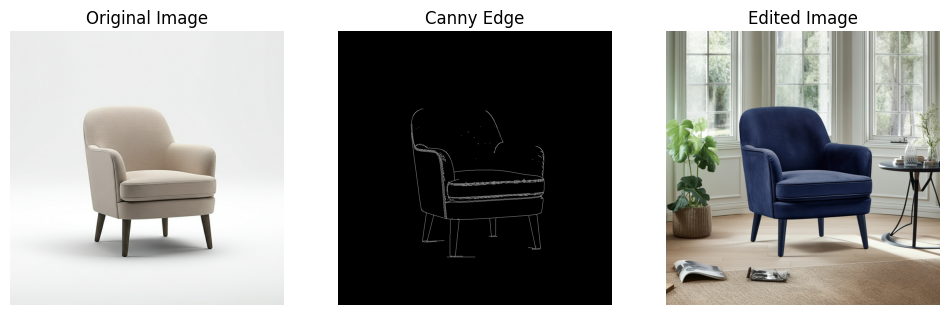

In [8]:
import cv2

generation_prompt = """
a simple accent chair in a neutral color
"""
generated_image = generation_model.generate_images(
    prompt=generation_prompt,
    number_of_images=1,
    aspect_ratio="1:1",
    safety_filter_level="block_some",
    person_generation="dont_allow",
)

generated_image[0].save("chair.png")
img = cv2.imread("chair.png")

# Setting parameter values
t_lower = 100  # Lower Threshold
t_upper = 150  # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper)
cv2.imwrite("chair_edge.png", edge)

control_image = ControlReferenceImage(
    reference_id=1, image=Image.load_from_file("chair_edge.png"), control_type="canny"
)

edit_prompt = "A photorealistic image along the lines of a navy suede accent chair in a living room, near big windows"

control_image = edit_model._generate_images(
    prompt=edit_prompt,
    number_of_images=1,
    aspect_ratio="1:1",
    reference_images=[control_image],
    safety_filter_level="block_some",

)

fig, axis = plt.subplots(1, 3, figsize=(12, 6))
axis[0].imshow(generated_image[0]._pil_image)
axis[0].set_title("Original Image")
axis[1].imshow(edge, cmap="gray")
axis[1].set_title("Canny Edge")
axis[2].imshow(control_image[0]._pil_image)
axis[2].set_title("Edited Image")
for ax in axis:
    ax.axis("off")
plt.show()

### Semantic segmentation classes

| Class ID | Instance Type | Class ID | Instance Type | Class ID | Instance Type | Class ID | Instance Type |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | backpack | 50 | carrot | 100 | sidewalk_pavement | 150 | skis |
| 1 | umbrella | 51 | hot_dog | 101 | runway | 151 | snowboard |
| 2 | bag | 52 | pizza | 102 | terrain | 152 | sports_ball |
| 3 | tie | 53 | donut | 103 | book | 153 | kite |
| 4 | suitcase | 54 | cake | 104 | box | 154 | baseball_bat |
| 5 | case | 55 | fruit_other | 105 | clock | 155 | baseball_glove |
| 6 | bird | 56 | food_other | 106 | vase | 156 | skateboard |
| 7 | cat | 57 | chair_other | 107 | scissors | 157 | surfboard |
| 8 | dog | 58 | armchair | 108 | plaything_other | 158 | tennis_racket |
| 9 | horse | 59 | swivel_chair | 109 | teddy_bear | 159 | net |
| 10 | sheep | 60 | stool | 110 | hair_dryer | 160 | base |
| 11 | cow | 61 | seat | 111 | toothbrush | 161 | sculpture |
| 12 | elephant | 62 | couch | 112 | painting | 162 | column |
| 13 | bear | 63 | trash_can | 113 | poster | 163 | fountain |
| 14 | zebra | 64 | potted_plant | 114 | bulletin_board | 164 | awning |
| 15 | giraffe | 65 | nightstand | 115 | bottle | 165 | apparel |
| 16 | animal_other | 66 | bed | 116 | cup | 166 | banner |
| 17 | microwave | 67 | table | 117 | wine_glass | 167 | flag |
| 18 | radiator | 68 | pool_table | 118 | knife | 168 | blanket |
| 19 | oven | 69 | barrel | 119 | fork | 169 | curtain_other |
| 20 | toaster | 70 | desk | 120 | spoon | 170 | shower_curtain |
| 21 | storage_tank | 71 | ottoman | 121 | bowl | 171 | pillow |
| 22 | conveyor_belt | 72 | wardrobe | 122 | tray | 172 | towel |
| 23 | sink | 73 | crib | 123 | range_hood | 173 | rug_floormat |
| 24 | refrigerator | 74 | basket | 124 | plate | 174 | vegetation |
| 25 | washer_dryer | 75 | chest_of_drawers | 125 | person | 175 | bicycle |
| 26 | fan | 76 | bookshelf | 126 | rider_other | 176 | car |
| 27 | dishwasher | 77 | counter_other | 127 | bicyclist | 177 | autorickshaw |
| 28 | toilet | 78 | bathroom_counter | 128 | motorcyclist | 178 | motorcycle |
| 29 | bathtub | 79 | kitchen_island | 129 | paper | 179 | airplane |
| 30 | shower | 80 | door | 130 | streetlight | 180 | bus |
| 31 | tunnel | 81 | light_other | 131 | road_barrier | 181 | train |
| 32 | bridge | 82 | lamp | 132 | mailbox | 182 | truck |
| 33 | pier_wharf | 83 | sconce | 133 | cctv_camera | 183 | trailer |
| 34 | tent | 84 | chandelier | 134 | junction_box | 184 | boat_ship |
| 35 | building | 85 | mirror | 135 | traffic_sign | 185 | slow_wheeled_object |
| 36 | ceiling | 86 | whiteboard | 136 | traffic_light | 186 | river_lake |
| 37 | laptop | 87 | shelf | 137 | fire_hydrant | 187 | sea |
| 38 | keyboard | 88 | stairs | 138 | parking_meter | 188 | water_other |
| 39 | mouse | 89 | escalator | 139 | bench | 189 | swimming_pool |
| 40 | remote | 90 | cabinet | 140 | bike_rack | 190 | waterfall |
| 41 | cell phone | 91 | fireplace | 141 | billboard | 191 | wall |
| 42 | television | 92 | stove | 142 | sky | 192 | window |
| 43 | floor | 93 | arcade_machine | 143 | pole | 193 | window_blind |
| 44 | stage | 94 | gravel | 144 | fence | | |
| 45 | banana | 95 | platform | 145 | railing_banister | | |
| 46 | apple | 96 | playingfield | 146 | guard_rail | | |
| 47 | sandwich | 97 | railroad | 147 | mountain_hill | | |
| 48 | orange | 98 | road | 148 | rock | | |
| 49 | broccoli | 99 | snow | 149 | frisbee | | |
